<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MatematicasParaIA/6_Probabilidad/probabilidad_2.ipynb"><img src='https://colab.research.google.com/assets/colab-badge.svg'/></a>

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

import pandas as pd
import seaborn as sns

# Repaso conceptos básicos (Caso discreto)

* Espacio muestral $\Omega$
* Eventos: $\mathcal{P}(\Omega)$
* Medida de probabilidad $p: \mathcal{P}(\Omega) \to [0, 1]$
  * $p(E \cup V) = p(E) + p(V) - p(E \cap V)$
  * $p(\Omega) = 1$
* Variable aleatoria: $X: \Omega \to \mathbb{N}$
* Distribuciones de probabilidad $f: \mathbb{N} \to [0, 1]$

Lo importante: entender cómo se construye un modelo probabilístico. Para eso es fundamental el caso multivariado.


$$f_{X,Y}: \mathbb{N} \times \mathbb{N} \to [0, 1]$$

$$\sum_x \sum_y f_{X,Y}(x, y) = 1$$

# Tiramos dos dados

$$X, Y \sim U(1, 6)$$

Distribución conjunta:

$$(X, Y) \sim f_{X,Y}$$

In [74]:
dado_A, dado_B = np.random.randint(1, 7, size=(2, 1000))
df = pd.DataFrame({"dado_A":dado_A, "dado_B":dado_B})

In [75]:
df

,dado_A,dado_B
0,2,1
1,6,1
2,1,6
3,4,5
4,5,1
...,...,...
995,3,2
996,6,2
997,3,3
998,6,6


Creamos *tabla de contingencia*

In [76]:
pd.crosstab(df.dado_A, df.dado_B)

dado_B,1,2,3,4,5,6
dado_A,,,,,,
1,30,22,23,32,26,39
2,36,31,36,23,22,28
3,27,25,27,25,26,21
4,13,26,29,30,32,35
5,26,28,22,36,27,15
6,25,35,30,29,35,28


Cuando aumentamos el número de muestras, la tabla de contingencia (normalizada) converge a la distribución de probabilidad conjunta:

In [77]:
n_muestras = 1000000
dado_A, dado_B = np.random.randint(1, 7, size=(2, n_muestras))
df = pd.DataFrame({"dado_A":dado_A, "dado_B":dado_B})
tabla_contingencia = pd.crosstab(df.dado_A, df.dado_B)
tabla_contingencia_normalizada = tabla_contingencia/n_muestras

tabla_contingencia_normalizada

dado_B,1,2,3,4,5,6
dado_A,,,,,,
1,0.027934,0.027849,0.027906,0.027803,0.027786,0.027544
2,0.027899,0.027578,0.027734,0.027737,0.027768,0.027747
3,0.027597,0.027961,0.027697,0.027595,0.027931,0.027569
4,0.027742,0.027482,0.027659,0.027990,0.028248,0.027562
5,0.027885,0.027883,0.027727,0.027626,0.027855,0.027718
6,0.027702,0.027583,0.027895,0.027839,0.028247,0.027722


Esta distribución es una "distribución producto"

$$f_{X, Y} (x, y) = f_X(x) f_Y(y) = 1/6 \cdot 1/6 = 1/36$$

# Tiramos un dado y el otro lo igualamos a mano

$$X \sim U(1, 6)$$

$$ Y := X $$

Distribución conjunta:

$$(X, Y) \sim f_{X,Y}$$

In [78]:
n_muestras = 1000000
dado_A = np.random.randint(1, 7, size=(n_muestras))
dado_B = dado_A.copy()
df = pd.DataFrame({"dado_A":dado_A, "dado_B":dado_B})
tabla_contingencia = pd.crosstab(df.dado_A, df.dado_B)
tabla_contingencia_normalizada = tabla_contingencia/n_muestras

tabla_contingencia_normalizada

dado_B,1,2,3,4,5,6
dado_A,,,,,,
1,0.166671,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.000000,0.166811,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.167162,0.000000,0.000000,0.00000
4,0.000000,0.000000,0.000000,0.166661,0.000000,0.00000
5,0.000000,0.000000,0.000000,0.000000,0.166565,0.00000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.16613


$X$ e $Y$ están correlacionados (de forma *extrema*)

$$ f_{X,Y}(x, y) = \begin{cases}
    1/6 & y=x \\
    0   & y \neq x
    \end{cases}$$

Las probabilidades condicionales ahora son distintas de las no condicionales:

$$ f_X(x | Y=1) = \begin{cases}
    1 & x=1 \\
    0 & x\neq 1
    \end{cases}$$

Pero si marginalizamos para obtener $f_Y$, vemos que $f_Y$ también está dada por $U(1,\dots,6)$

$$ f_Y(y) = \sum_{x=1}^{6} f_{X,Y}(x, y) = 1/36 + \dots + 1/36 = 1/6 $$

$$ Y \sim U(1,\dots,6)$$

Las marginales son las mismas que en el caso anterior, pero las variables ya no son independientes

# Tiramos dos dados y vemos la suma

$$X, Y \sim U(1, 6)$$

$$Z = X + Y$$

Distribución conjunta:

$$(X, Y, Z) \sim f_{X,Y,Z}$$

Ahora la "tabla de contingencia" sería un cubo 3D. Pero podemos visualizarlo así

In [79]:
n_muestras = 1000000
dado_A, dado_B = np.random.randint(1, 7, size=(2, n_muestras))
dado_C = dado_A + dado_B
df = pd.DataFrame({"dado_A":dado_A, "dado_B":dado_B, "dado_C":dado_C})
tabla_contingencia = pd.crosstab([df.dado_A, df.dado_B], df.dado_C)
tabla_contingencia


dado_C            2      3      4      5      6      7      8      9      10  \
dado_A dado_B                                                                  
1      1       27832      0      0      0      0      0      0      0      0   
       2           0  27789      0      0      0      0      0      0      0   
       3           0      0  28050      0      0      0      0      0      0   
       4           0      0      0  27859      0      0      0      0      0   
       5           0      0      0      0  27711      0      0      0      0   
       6           0      0      0      0      0  27527      0      0      0   
2      1           0  27711      0      0      0      0      0      0      0   
       2           0      0  27946      0      0      0      0      0      0   
       3           0      0      0  27619      0      0      0      0      0   
       4           0      0      0      0  27646      0      0      0      0   
       5           0      0      0      0      0  27711      0      0      0   
       6           0      0      0      0      0      0  27847      0      0   
3      1           0      0  27620      0      0      0      0      0      0   
       2           0      0      0  27604      0      0      0      0      0   
       3           0      0      0      0  27654      0      0      0      0   
       4           0      0      0      0      0  27741      0      0      0   
       5           0      0      0      0      0      0  27886      0      0   
       6           0      0      0      0      0      0      0  27765      0   
4      1           0      0      0  27780      0      0      0      0      0   
       2           0      0      0      0  27585      0      0      0      0   
       3           0      0      0      0      0  27480      0      0      0   
       4           0      0      0      0      0      0  27706      0      0   
       5           0      0      0      0      0      0      0  27573      0   
       6           0      0      0      0      0      0      0      0  27757   
5      1           0      0      0      0  27565      0      0      0      0   
       2           0      0      0      0      0  28050      0      0      0   
       3           0      0      0      0      0      0  28106      0      0   
       4           0      0      0      0      0      0      0  28023      0   
       5           0      0      0      0      0      0      0      0  27972   
       6           0      0      0      0      0      0      0      0      0   
6      1           0      0      0      0      0  27744      0      0      0   
       2           0      0      0      0      0      0  27858      0      0   
       3           0      0      0      0      0      0      0  27928      0   
       4           0      0      0      0      0      0      0      0  27932   
       5           0      0      0      0      0      0      0      0      0   
       6           0      0      0      0      0      0      0      0      0   

dado_C            11     12  
dado_A dado_B                
1      1           0      0  
       2           0      0  
       3           0      0  
       4           0      0  
       5           0      0  
       6           0      0  
2      1           0      0  
       2           0      0  
       3           0      0  
       4           0      0  
       5           0      0  
       6           0      0  
3      1           0      0  
       2           0      0  
       3           0      0  
       4           0      0  
       5           0      0  
       6           0      0  
4      1           0      0  
       2           0      0  
       3           0      0  
       4           0      0  
       5           0      0  
       6           0      0  
5      1           0      0  
       2           0      0  
       3           0      0  
       4           0      0  
       5           0      0  
       6       27929      0  

$$ f_{X,Y, Z}(x, y, z) = \begin{cases}
    1/36 & z = x+y \\
    0   & z \neq x+y
    \end{cases}$$

Si calculamos tablas de contingencia tomando de a dos variables, estamos viendo las **distribuciones marginales**.

In [80]:
tabla_contingencia = pd.crosstab(df.dado_A, df.dado_B)
tabla_contingencia_normalizada = tabla_contingencia/n_muestras

tabla_contingencia_normalizada.round(4) #recuperamos lo mismo que antes

dado_B,1,2,3,4,5,6
dado_A,,,,,,
1,0.0278,0.0278,0.0280,0.0279,0.0277,0.0275
2,0.0277,0.0279,0.0276,0.0276,0.0277,0.0278
3,0.0276,0.0276,0.0277,0.0277,0.0279,0.0278
4,0.0278,0.0276,0.0275,0.0277,0.0276,0.0278
5,0.0276,0.0280,0.0281,0.0280,0.0280,0.0279
6,0.0277,0.0279,0.0279,0.0279,0.0277,0.0278


Especialmente interesante es marginalizar sobre $Y$ obteniendo $f_{X,Z}$

In [81]:
tabla_contingencia = pd.crosstab(df.dado_A, df.dado_C)
tabla_contingencia_normalizada = tabla_contingencia/n_muestras

tabla_contingencia_normalizada.round(4)

dado_C,2,3,4,5,6,7,8,9,10,11,12
dado_A,,,,,,,,,,,
1,0.0278,0.0278,0.0280,0.0279,0.0277,0.0275,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0277,0.0279,0.0276,0.0276,0.0277,0.0278,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0276,0.0276,0.0277,0.0277,0.0279,0.0278,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0278,0.0276,0.0275,0.0277,0.0276,0.0278,0.0000,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.0276,0.0280,0.0281,0.0280,0.0280,0.0279,0.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0277,0.0279,0.0279,0.0279,0.0277,0.0278


<AxesSubplot:xlabel='dado_C', ylabel='dado_A'>

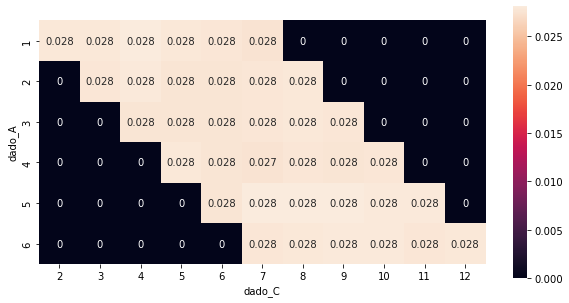

In [82]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(tabla_contingencia_normalizada, annot=tabla_contingencia_normalizada.round(3), square=True, ax=ax)

In [83]:
n_muestras = 1000000
dado_A = np.random.randint(1, 7, size=(n_muestras))
epsilon = np.random.randint(-1, 2, size=(n_muestras))
Y = dado_A + epsilon
df = pd.DataFrame({"dado_A":dado_A, "Y":Y})
tabla_contingencia = pd.crosstab(df.dado_A, df.Y)
tabla_contingencia_normalizada = tabla_contingencia/n_muestras
tabla_contingencia_normalizada.round(4)


Y,0,1,2,3,4,5,6,7
dado_A,,,,,,,,
1,0.0558,0.0553,0.0553,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0554,0.0556,0.0555,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0552,0.0554,0.0558,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0557,0.0558,0.0560,0.0000,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.0558,0.0556,0.0555,0.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0553,0.0552,0.0556


# Normal bivariada

$$(X, Y) \sim \mathcal{N}(\mu_X, \mu_Y, \sigma_X, \sigma_Y, \rho)$$

### Caso no correlacionado

In [84]:
n_muestras = 100000
cov_matrix = [[1, 0], [0, 1]]
distribucion = st.multivariate_normal(mean = [0, 0], cov = cov_matrix)
xs, ys = distribucion.rvs(size=n_muestras).T
df = pd.DataFrame({'X': xs, 'Y':ys})

<AxesSubplot:xlabel='X', ylabel='Y'>

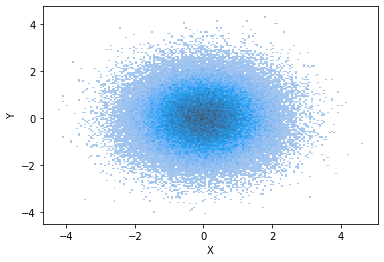

In [85]:
fig, ax = plt.subplots()
sns.histplot(df, x='X', y='Y')

<AxesSubplot:xlabel='Y', ylabel='Proportion'>

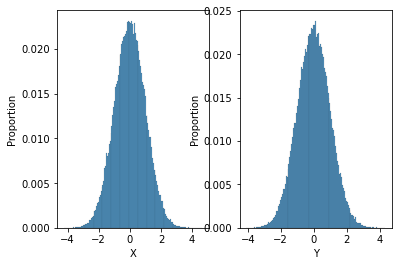

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.histplot(df.X, ax=ax1, stat='proportion')
sns.histplot(df.Y, ax=ax2, stat='proportion')

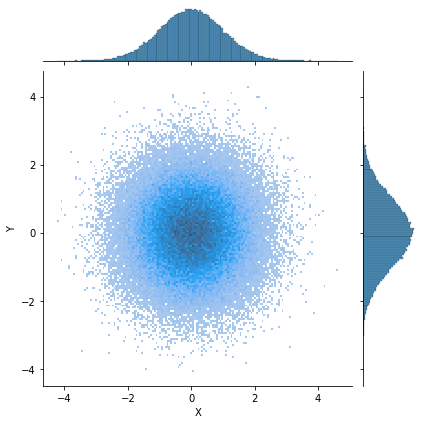

In [87]:
sns.jointplot(data=df, x='X', y='Y', kind="hist")

Notar que es lo mismo que antes en caso discreto: marginalizar es sumar sobre filas o sobre columnas (y normalizar)

### Caso correlacionado

$$\rho = 0.8$$

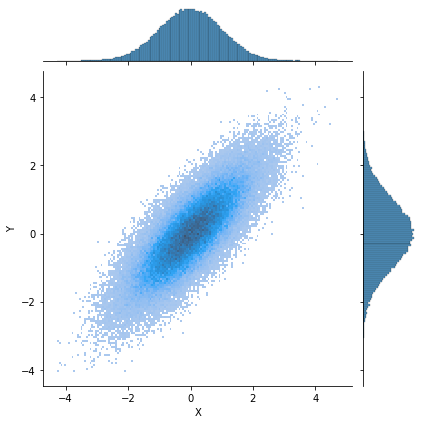

In [88]:
n_muestras = 100000
rho = 0.8
cov_matrix = [[1, 0.8], [0.8, 1]]
distribucion = st.multivariate_normal(mean = [0, 0], cov = cov_matrix)
xs, ys = distribucion.rvs(size=n_muestras).T
df = pd.DataFrame({'X': xs, 'Y':ys})
sns.jointplot(data=df, x='X', y='Y', kind="hist")

In [89]:
df[df.Y == 2]

,X,Y


In [90]:
tol = 0.01
df[(2 - tol <= df.Y) & (df.Y <= 2+tol)]

,X,Y
1257,0.392431,1.996324
1621,0.661308,2.002411
3666,1.355747,1.991837
4406,0.409151,1.998083
4576,1.537951,1.996457
...,...,...
94013,2.535044,1.992819
94840,1.679023,2.000619
96050,1.428392,2.002934
96670,1.927275,1.997210


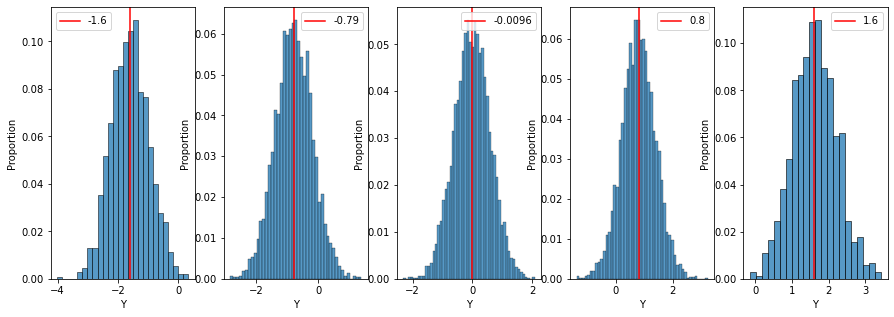

In [99]:
def graficar_condicionales(df, X_values, tol=0.1, kind='hist'):
    fig, axes = plt.subplots(1, len(X_values), figsize=(15,5))
    axes = axes.flatten()
    for ax, X_value in zip(axes, X_values):
        df_condicionado = df[(X_value - tol <= df.X) & (df.X <= X_value + tol)]
        if kind == 'hist':
            sns.histplot(df_condicionado.Y, ax=ax, stat='proportion')
        elif kind == 'kde':
            sns.kdeplot(df_condicionado.Y, ax=ax)
        else:
            raise ValueError
        mean = df_condicionado.Y.mean()
        ax.axvline(x=mean, color='red', label='{:.2g}'.format(mean))
        ax.legend()

graficar_condicionales(df, [-2, -1, 0, 1, 2])

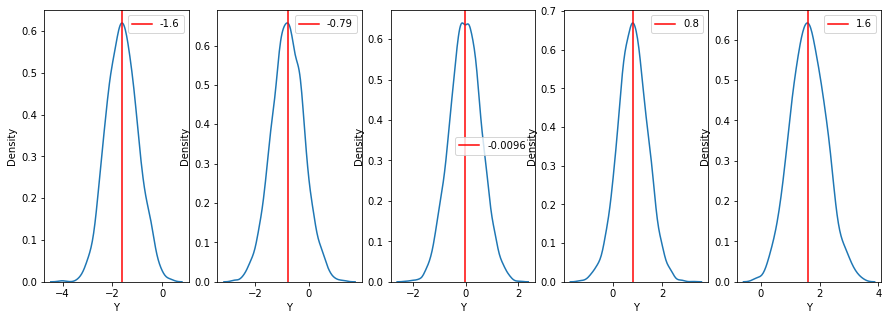

In [100]:
graficar_condicionales(df, [-2, -1, 0, 1, 2], kind='kde')

# Dependencia lineal con error gaussiano

$$ X \sim U([0, 1]) $$
$$ Y = \alpha X + \varepsilon \text{, donde}$$
$$ \alpha = 3 $$
$$ \varepsilon \sim \mathcal{N}(0, 0.1) $$

In [101]:
n_muestras = 100000
xs = st.uniform().rvs(size=n_muestras)
alpha = 3
epsilon = st.norm(loc=0, scale=0.1).rvs(size=n_muestras)
ys = alpha * xs + epsilon


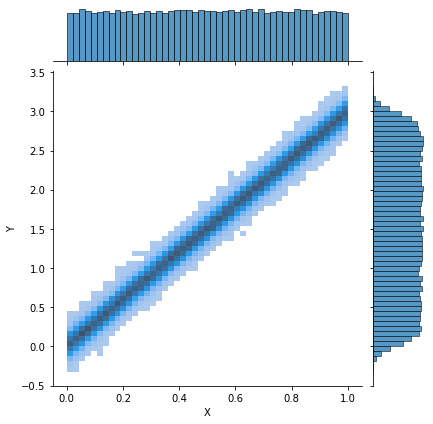

In [102]:
df = pd.DataFrame({'X': xs, 'Y':ys})
sns.jointplot(data=df, x='X', y='Y', kind="hist")

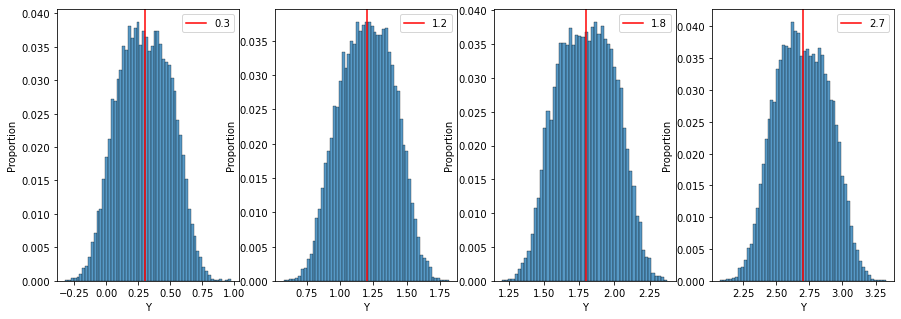

In [103]:
graficar_condicionales(df, [0.1, 0.4, 0.6, 0.9])